In [1]:
import rebound
import reboundx
import numpy as np

Nout = 1000
tmax = 1.e4
C2 = 1.e6
dt = 5.e-2
times = np.logspace(0,np.log10(tmax),Nout)

def setup():
    sim = rebound.Simulation()
    sim.add(m=1.)
    sim.add(m=1.e-5, a=1., e=0.1)
    #sim.add(m=1.e-3, a=2., e=0.1)
    sim.move_to_com()
    sim.integrator="whfast"
    sim.dt = dt
    rebx = reboundx.Extras(sim)
    gr = rebx.add("gr")
    gr.params["c"] = np.sqrt(C2)
    return sim, gr, rebx

In [2]:
sim, gr, rebx = setup()
rebx.integrator = "implicit_midpoint"
gr.operator_order = 2
gr.force_as_operator=1

In [3]:
%%time
Eerrimp = np.zeros(Nout)
E0 = rebx.gr_hamiltonian(sim, gr)
for i, time in enumerate(times):
    sim.integrate(time, exact_finish_time=0)
    E = rebx.gr_hamiltonian(sim, gr)
    Eerrimp[i] = abs((E-E0)/E0)

CPU times: user 2.48 s, sys: 18.2 ms, total: 2.5 s
Wall time: 2.51 s


In [4]:
sim, gr, rebx = setup()

In [5]:
%%time
times = np.logspace(0,np.log10(tmax),Nout)
Eerrnaive = np.zeros(Nout)
E0 = rebx.gr_hamiltonian(sim, gr)
for i, time in enumerate(times):
    sim.integrate(time, exact_finish_time=0)
    E = rebx.gr_hamiltonian(sim, gr)
    Eerrnaive[i] = abs((E-E0)/E0)

/Users/dtamayo/Documents/workspace/rebound/rebound/simulation.py:508: RuntimeWarning: REBOUNDx: Passing a velocity-dependent force to WHFAST. Need to apply as an operator.
  warnings.warn(msg[1:], RuntimeWarning)


CPU times: user 331 ms, sys: 4.22 ms, total: 335 ms
Wall time: 337 ms


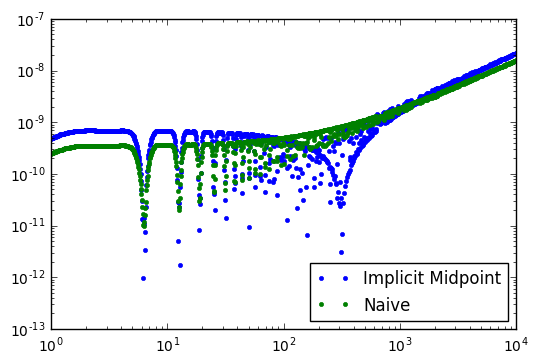

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(times, Eerrimp, '.', label='Implicit Midpoint')
ax.plot(times, Eerrnaive, '.', label='Naive')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='lower right')

In [7]:
sim, gr, rebx = setup()
gr.operator_order = 2
gr.force_as_operator=1
rebx.integrator = "euler"

In [8]:
sim.step()

In [9]:
%%time
Eerreuler = np.zeros(Nout)
E0 = rebx.gr_hamiltonian(sim, gr)
for i, time in enumerate(times):
    sim.integrate(time, exact_finish_time=0)
    E = rebx.gr_hamiltonian(sim, gr)
    Eerreuler[i] = abs((E-E0)/E0)

CPU times: user 349 ms, sys: 3.07 ms, total: 352 ms
Wall time: 353 ms


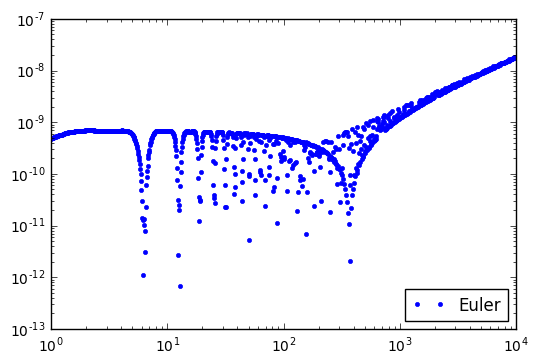

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(times, Eerreuler, '.', label='Euler')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='lower right')

In [11]:
sim, gr, rebx = setup()
gr.operator_order = 2
gr.force_as_operator=1
rebx.integrator = "none"

In [12]:
%%time
Eerrnone = np.zeros(Nout)
E0 = rebx.gr_hamiltonian(sim, gr)
for i, time in enumerate(times):
    sim.integrate(time, exact_finish_time=0)
    E = rebx.gr_hamiltonian(sim, gr)
    Eerrnone[i] = abs((E-E0)/E0)

CPU times: user 108 ms, sys: 1.6 ms, total: 109 ms
Wall time: 108 ms


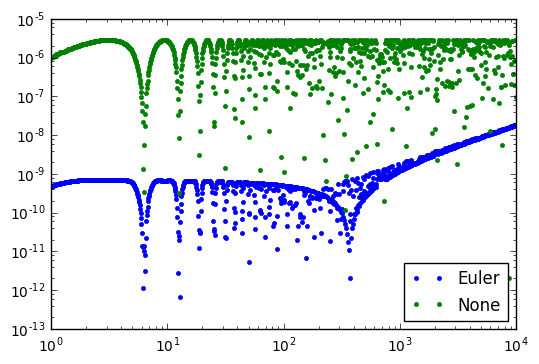

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(times, Eerreuler, '.', label='Euler')
ax.plot(times, Eerrnone, '.', label='None')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='lower right')

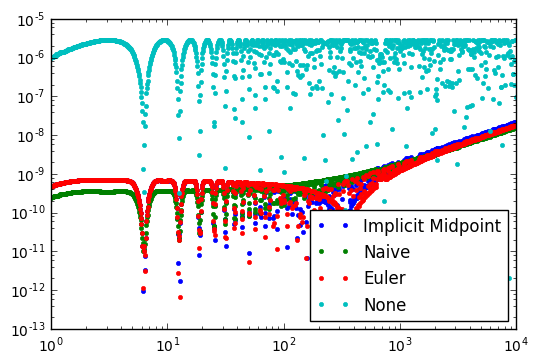

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(times, Eerrimp, '.', label='Implicit Midpoint')
ax.plot(times, Eerrnaive, '.', label='Naive')
ax.plot(times, Eerreuler, '.', label='Euler')
ax.plot(times, Eerrnone, '.', label='None')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='lower right')